# FASHION CLASS CLASSIFICATION

# STEP 1: PROBLEM STATEMENT AND BUSINESS CASE

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

The 10 classes are as follows:  
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 

# STEP 2: IMPORTING DATA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
fas_test=pd.read_csv("fashion-mnist_test.csv")
fas_train=pd.read_csv("fashion-mnist_train.csv")

In [3]:
fas_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fas_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fas_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [6]:
train=np.array(fas_train,dtype="float32")
test=np.array(fas_test,dtype="float32")

# STEP 3: VISUALIZATION OF THE DATASET  

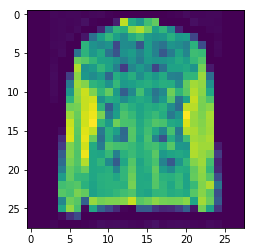

In [7]:
plt.imshow(train[5,1:].reshape(28,28))

3.0

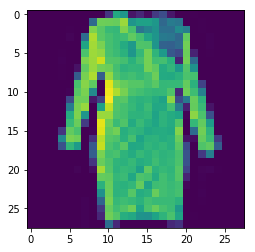

In [8]:
plt.imshow(train[300,1:].reshape(28,28))
label=train[300,0]
label

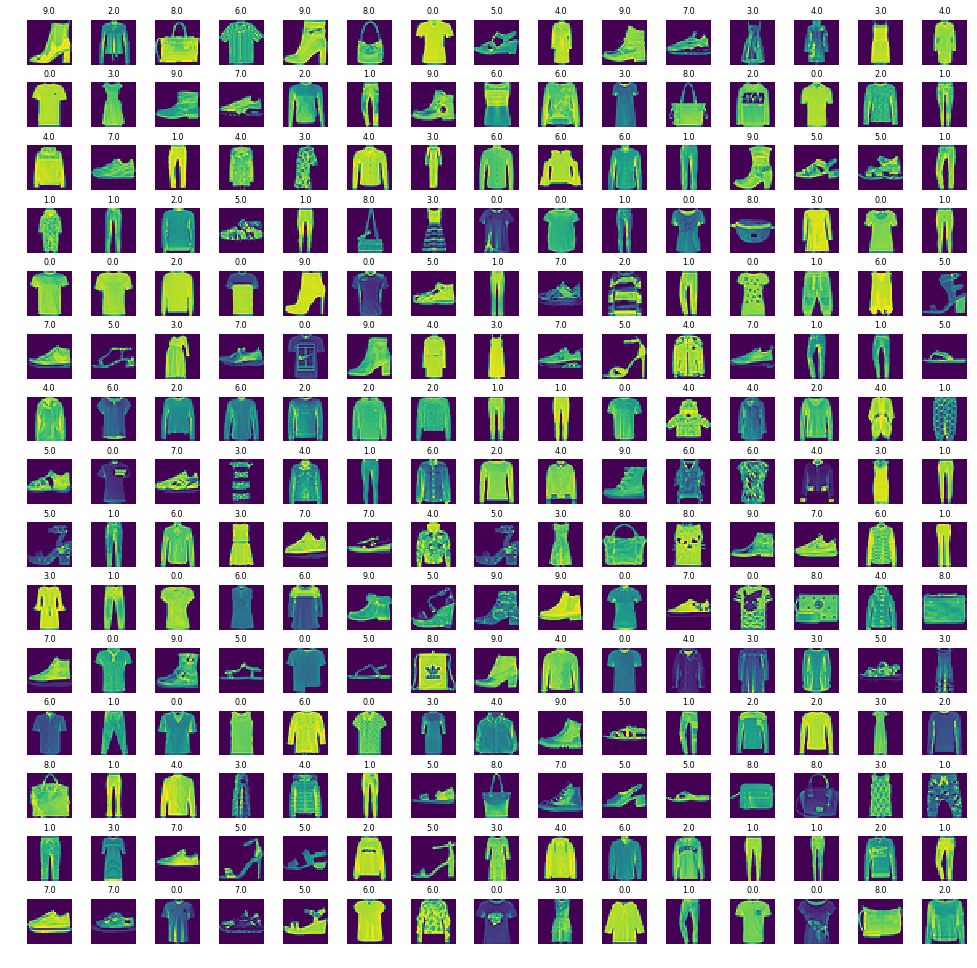

In [9]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( train[index,1:].reshape((28,28)) )
    axes[i].set_title(train[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [10]:
X_train=train[:,1:]/255
y_train=train[:,0]

In [11]:
X_test=test[:,1:]/255
y_test=test[:,0]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [13]:
# * unpack the tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [14]:
X_train.shape

(48000, 28, 28, 1)

In [15]:
y_train.shape

(48000,)

In [16]:
X_validate.shape

(12000, 28, 28, 1)

# STEP 4: TRAINING THE MODEL

In [23]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.


You are using pip version 18.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [17]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [18]:
cnn_model = Sequential()

# Try 32 fliters first then 64
# cnn_model.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(32,3, 3, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  del sys.path[0]
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


In [19]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [20]:
epochs = 50

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        nb_epoch = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))



c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 33s 694us/step - loss: 0.8634 - acc: 0.7119 - val_loss: 0.6137 - val_acc: 0.7862
Epoch 2/50
48000/48000 [==============================] - 28s 584us/step - loss: 0.5368 - acc: 0.8079 - val_loss: 0.5371 - val_acc: 0.8139
Epoch 3/50
48000/48000 [==============================] - 28s 580us/step - loss: 0.4993 - acc: 0.8215 - val_loss: 0.5175 - val_acc: 0.8197
Epoch 4/50
48000/48000 [==============================] - 28s 581us/step - loss: 0.4618 - acc: 0.8373 - val_loss: 0.4594 - val_acc: 0.8447
Epoch 5/50
48000/48000 [==============================] - 27s 568us/step - loss: 0.4454 - acc: 0.8428 - val_loss: 0.4640 - val_acc: 0.8479
Epoch 6/50
48000/48000 [==============================] - 27s 558us/step - loss: 0.4261 - acc: 0.8492 - val_loss: 0.4609 - val_acc: 0.8434
Epoch 7/50
48000/48000 [==============================] - 26s 533us/step - loss: 0.4130 - acc: 0.8530 - val_loss: 0.

# STEP 5: EVALUATING THE MODEL

In [21]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 3s 257us/step
Test Accuracy : 0.861


In [22]:
# get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)

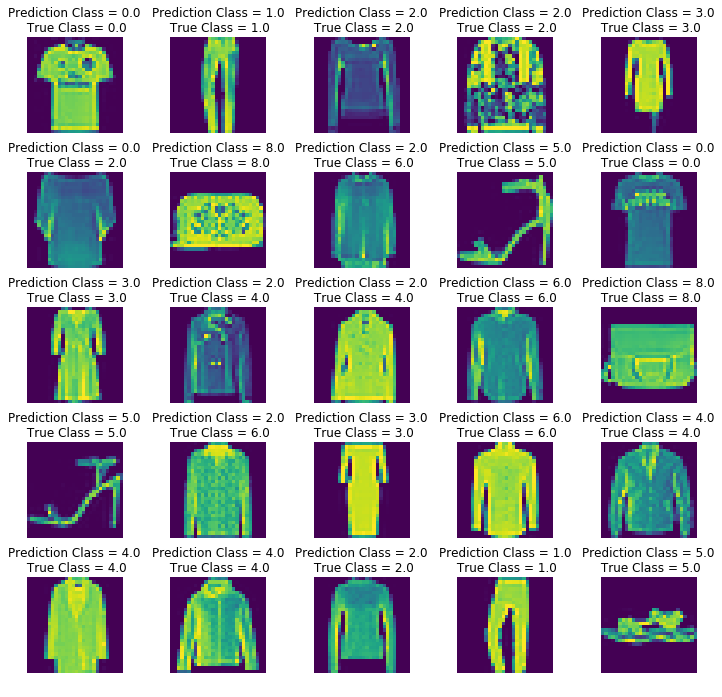

In [23]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

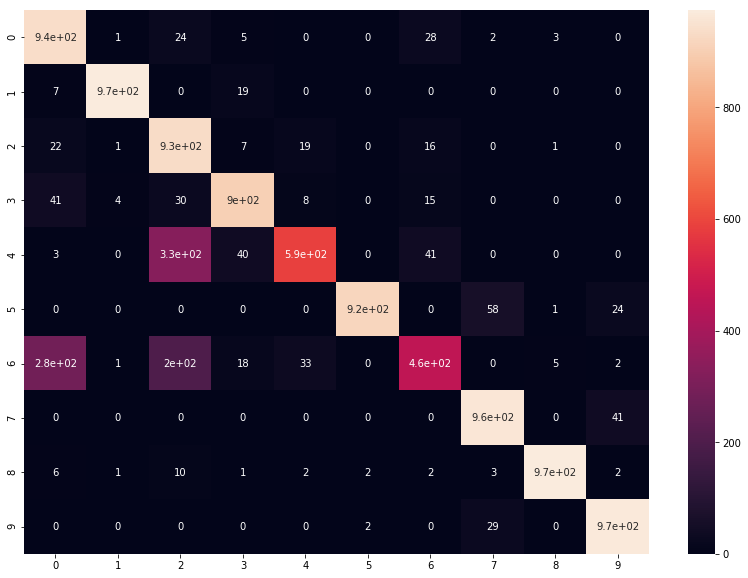

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [25]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.72      0.94      0.82      1000
     Class 1       0.99      0.97      0.98      1000
     Class 2       0.61      0.93      0.74      1000
     Class 3       0.91      0.90      0.91      1000
     Class 4       0.90      0.59      0.71      1000
     Class 5       1.00      0.92      0.95      1000
     Class 6       0.82      0.46      0.59      1000
     Class 7       0.91      0.96      0.94      1000
     Class 8       0.99      0.97      0.98      1000
     Class 9       0.93      0.97      0.95      1000

   micro avg       0.86      0.86      0.86     10000
   macro avg       0.88      0.86      0.86     10000
weighted avg       0.88      0.86      0.86     10000

